In [107]:
# ignores warnings 
import warnings
warnings.filterwarnings('ignore')

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import tarfile
import datetime
import matplotlib.dates as mdates 
from scipy import stats
from api_key import api_key



In [2]:
# set the year 
# since=2005
# until=2016

In [3]:
# pull the API
# url_crime=(f"https://api.usa.gov/crime/fbi/sapi/api/data/arrest/national/offense/monthly/{since}/{until}?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv")
# url_crime

In [4]:
# Make pretty print
#response = requests.get(url_crime)
#response_json = response.json()
#print(json.dumps(response_json, indent=4, sort_keys=True))

In [5]:
## fine out the size of the tar file
tar = tarfile.open("Crime_DataFiles/DATA_01-2013_03-2018.tar.gz", "r:gz")
for tarinfo in tar:
    print(tarinfo.name, "is", tarinfo.size, "bytes in size and is ", end="")
    if tarinfo.isreg():
        print("a regular file.")
    elif tarinfo.isdir():
        print("a directory.")
    else:
        print("something else.")
tar.close()

stage3.csv is 149698584 bytes in size and is a regular file.


In [6]:
# read tar g.zip file - tar.zip file can load to main repo 
df = pd.read_csv('Crime_DataFiles/DATA_01-2013_03-2018.tar.gz', compression='gzip', header=0, sep=',', error_bad_lines=False)


In [7]:
# check column values
crime_df = pd.DataFrame(df)
print(crime_df.columns.values)



['stage3.csv' 'date' 'state' 'city_or_county' 'address' 'n_killed'
 'n_injured' 'incident_url' 'source_url' 'incident_url_fields_missing'
 'congressional_district' 'gun_stolen' 'gun_type'
 'incident_characteristics' 'latitude' 'location_description' 'longitude'
 'n_guns_involved' 'notes' 'participant_age' 'participant_age_group'
 'participant_gender' 'participant_name' 'participant_relationship'
 'participant_status' 'participant_type' 'sources' 'state_house_district'
 'state_senate_district']


In [8]:
#purpose of viewing data only
#crime_df['participant_age_group'].unique()


In [9]:
# create crime dataframe
crime_df = pd.DataFrame(df, columns = ['stage3.csv','date', 'state', 'city_or_county', 'n_killed', 'n_injured', 'participant_gender','participant_age_group','latitude','longitude'])
crime_df.rename(columns ={'stage3.csv':'Incident','date':'Date','state':'State','city_or_county':'City or Country',
                           'n_killed':'Number Killed','n_injured':'Number Injured','participant_gender':'Gender Involved',
                           'participant_age_group':'Age Group','latitude':'Latitude','longitude':'Longitude'}, inplace=True)
crime_df.head()

,Incident,Date,State,City or Country,Number Killed,Number Injured,Gender Involved,Age Group,Latitude,Longitude
0,461105.0,2013-01-01,Pennsylvania,Mckeesport,0.0,4.0,0::Male||1::Male||3::Male||4::Female,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,40.3467,-79.8559
1,460726.0,2013-01-01,California,Hawthorne,1.0,3.0,0::Male,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,33.9090,-118.3330
2,478855.0,2013-01-01,Ohio,Lorain,1.0,3.0,0::Male||1::Male||2::Male||3::Male||4::Male,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,41.4455,-82.1377
3,478925.0,2013-01-05,Colorado,Aurora,4.0,0.0,0::Female||1::Male||2::Male||3::Male,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,39.6518,-104.8020
4,478959.0,2013-01-07,North Carolina,Greensboro,2.0,2.0,0::Female||1::Male||2::Male||3::Female,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,36.1140,-79.9569


In [10]:
# Get only the 1.1 year of data for Obama and Trump Presidency
ObamaTrump_df = crime_df.loc[(crime_df['Date']>='2015-01-01') & (crime_df['Date']<'20190101')]
#len(ObamaTrump_df)
#ObamaTrump_df['Male']=''
#ObamaTrump_df['Female']=''
#ObamaTrump_df

In [11]:
# Add Column Name - Presidency and fill in base on 2 years Obama and Trump was President
ObamaTrump_df.loc[(ObamaTrump_df['Date']>='2015-01-01') & (ObamaTrump_df['Date'] <'2016-04-01'), 'Presidency'] ='Obama'
ObamaTrump_df.loc[(ObamaTrump_df['Date']>='2017-01-01') & (ObamaTrump_df['Date'] <'2018-04-01'), 'Presidency'] ='Trump'
ObamaTrump_df

,Incident,Date,State,City or Country,Number Killed,Number Injured,Gender Involved,Age Group,Latitude,Longitude,Presidency
52132,274168.0,2015-01-01,Oklahoma,Tulsa,0.0,2.0,0::Female||1::Male,0::Adult 18+||1::Adult 18+,36.0934,-95.8870,Obama
52133,276211.0,2015-01-01,Louisiana,Labadieville,1.0,0.0,0::Male,0::Adult 18+,29.8312,-90.9609,Obama
52134,272302.0,2015-01-01,Mississippi,Hattiesburg,0.0,0.0,0::Male,0::Adult 18+,31.3271,-89.2903,Obama
52135,272482.0,2015-01-01,Alabama,Bessemer,0.0,2.0,0::Male||1::Male,NaN,33.4423,-86.9322,Obama
52136,272487.0,2015-01-01,Illinois,Chicago,0.0,1.0,0::Male,NaN,41.9202,-87.7857,Obama
...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142.0,2018-03-31,Louisiana,Rayne,0.0,0.0,0::Female,0::Adult 18+,NaN,NaN,Trump
239673,1083139.0,2018-03-31,Louisiana,Natchitoches,1.0,0.0,0::Male||1::Male,0::Adult 18+||1::Adult 18+,31.7537,-93.0836,Trump
239674,1083151.0,2018-03-31,Louisiana,Gretna,0.0,1.0,0::Male,0::Adult 18+,29.9239,-90.0442,Trump
239675,1082514.0,2018-03-31,Texas,Houston,1.0,0.0,0::Male,0::Adult 18+,29.7201,-95.6110,Trump


In [46]:
ObamaTrump_df['Male'] = ObamaTrump_df['Gender Involved'].str.count('Male')
ObamaTrump_df['Female'] = ObamaTrump_df['Gender Involved'].str.count('Female')
ObamaTrump_df['Child 0-11'] = ObamaTrump_df['Age Group'].str.count('Child 0-11')
ObamaTrump_df['Teen 12-17'] = ObamaTrump_df['Age Group'].str.count('Teen 12-17')
ObamaTrump_df['Adult 18+'] = ObamaTrump_df['Age Group'].str.count('Adult 18+')
ObamaTrump_df['Month Year'] = pd.to_datetime(ObamaTrump_df['Date']).dt.to_period('M')
#ObamaTrump_df['Year Month'] = [''.join(x.split('-')[0:2]) for x in ObamaTrump_df.Date]
ObamaTrump_df.head()

,Incident,Date,State,City or Country,Number Killed,Number Injured,Gender Involved,Age Group,Latitude,Longitude,Presidency,Male,Female,Child 0-11,Teen 12-17,Adult 18+,Year Month,Month Year
52132,274168.0,2015-01-01,Oklahoma,Tulsa,0.0,2.0,0::Female||1::Male,0::Adult 18+||1::Adult 18+,36.0934,-95.8870,Obama,1.0,1.0,0.0,0.0,2.0,201501,2015-01
52133,276211.0,2015-01-01,Louisiana,Labadieville,1.0,0.0,0::Male,0::Adult 18+,29.8312,-90.9609,Obama,1.0,0.0,0.0,0.0,1.0,201501,2015-01
52134,272302.0,2015-01-01,Mississippi,Hattiesburg,0.0,0.0,0::Male,0::Adult 18+,31.3271,-89.2903,Obama,1.0,0.0,0.0,0.0,1.0,201501,2015-01
52135,272482.0,2015-01-01,Alabama,Bessemer,0.0,2.0,0::Male||1::Male,NaN,33.4423,-86.9322,Obama,2.0,0.0,NaN,NaN,NaN,201501,2015-01
52136,272487.0,2015-01-01,Illinois,Chicago,0.0,1.0,0::Male,NaN,41.9202,-87.7857,Obama,1.0,0.0,NaN,NaN,NaN,201501,2015-01


In [47]:
ObamaTrump_df.dropna(subset=['Presidency'],inplace=True)
#ObamaTrump_df.dropna(subset=['Presidency','Male','Female','Child 0-11','Teen 12-17','Adult 18+'],inplace=True)
#ObamaTrump_df.dropna(subset=['Presidency','Male','Female'],inplace=True)

In [48]:
# check validate data
output_file = "Crime_DataFiles/crime_analysis.csv"
ObamaTrump_df.to_csv(output_file, index = False)

## Run Data From Export CSV  

In [108]:
# Run using a subset of data exported out for analysis
# read csv
crime_file= "Crime_DataFiles/crime_analysis.csv"
re_Crime =pd.read_csv(crime_file)
re_Crime.head()

,Incident,Date,State,City or Country,Number Killed,Number Injured,Gender Involved,Age Group,Latitude,Longitude,Presidency,Male,Female,Child 0-11,Teen 12-17,Adult 18+,Year Month,Month Year
0,274168.0,2015-01-01,Oklahoma,Tulsa,0.0,2.0,0::Female||1::Male,0::Adult 18+||1::Adult 18+,36.0934,-95.8870,Obama,1.0,1.0,0.0,0.0,2.0,201501,2015-01
1,276211.0,2015-01-01,Louisiana,Labadieville,1.0,0.0,0::Male,0::Adult 18+,29.8312,-90.9609,Obama,1.0,0.0,0.0,0.0,1.0,201501,2015-01
2,272302.0,2015-01-01,Mississippi,Hattiesburg,0.0,0.0,0::Male,0::Adult 18+,31.3271,-89.2903,Obama,1.0,0.0,0.0,0.0,1.0,201501,2015-01
3,272482.0,2015-01-01,Alabama,Bessemer,0.0,2.0,0::Male||1::Male,NaN,33.4423,-86.9322,Obama,2.0,0.0,NaN,NaN,NaN,201501,2015-01
4,272487.0,2015-01-01,Illinois,Chicago,0.0,1.0,0::Male,NaN,41.9202,-87.7857,Obama,1.0,0.0,NaN,NaN,NaN,201501,2015-01


In [109]:
# Summary by months - for graphs
Total_Incident = re_Crime.groupby("Year Month").count()['Incident']
killed = re_Crime.groupby(["Year Month"]).sum()["Number Killed"]
injured = re_Crime.groupby(["Year Month"]).sum()["Number Injured"]
male = re_Crime.groupby(["Year Month"]).sum()["Male"]
female = re_Crime.groupby(["Year Month"]).sum()["Female"]
child = re_Crime.groupby(["Year Month"]).sum()["Child 0-11"]
teen = re_Crime.groupby(["Year Month"]).sum()["Teen 12-17"]
adult = re_Crime.groupby(["Year Month"]).sum()["Adult 18+"]


summary_months = pd.DataFrame({
                             
                             "Total Incidents":Total_Incident,
                              "Male":male,
                              "Female":female,
                              "Killed":killed,
                              "Injured":injured,
                              "Child":child,
                              "Teen":teen,
                              "Adult":adult
                             })
summary_months.head()


,Total Incidents,Male,Female,Killed,Injured,Child,Teen,Adult
Year Month,,,,,,,,
201501,3907,5105.0,670.0,1123.0,1808.0,71.0,397.0,5129.0
201502,3108,3803.0,620.0,870.0,1378.0,64.0,299.0,3895.0
201503,4314,5527.0,842.0,1090.0,2093.0,110.0,483.0,5550.0
201504,4471,5524.0,814.0,995.0,2149.0,87.0,414.0,5650.0
201505,5015,6453.0,873.0,1164.0,2677.0,127.0,508.0,6450.0


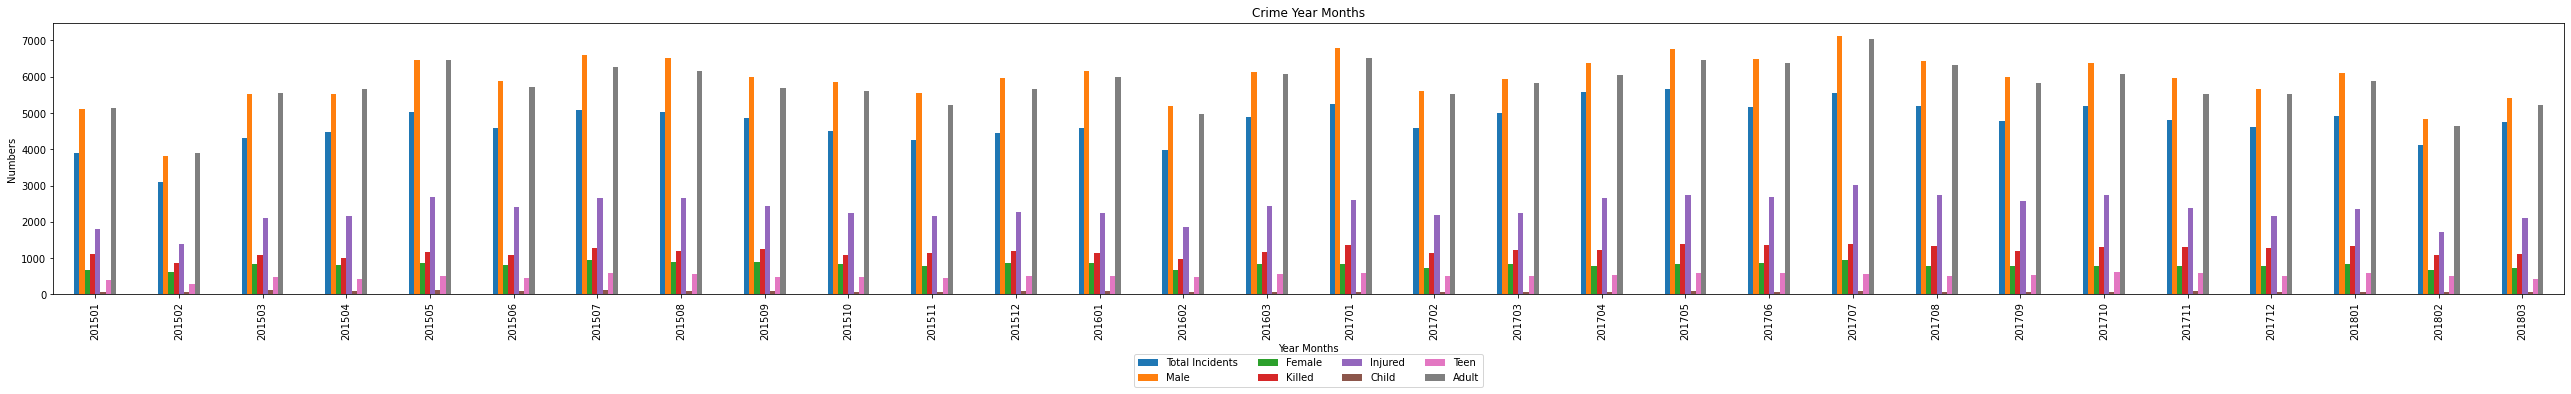

<Figure size 432x288 with 0 Axes>

In [126]:
#graph
# Pandas can also plot multiple columns if the DataFrame includes them


multi_plot = summary_months.plot(kind="bar", figsize=(45,5))
multi_plot.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=4)

# Plot x and y labels and title
plt.title('Crime Year Months')
plt.xlabel('Year Months')
plt.ylabel('Numbers')

plt.show()
plt.tight_layout()


In [128]:
# Summary Obama
re_Crime_df= re_Crime.loc[(re_Crime["Presidency"] == 'Obama')]
cnt_Incident = re_Crime_df.groupby('Presidency').count()['Incident']
Male = re_Crime_df.groupby('Presidency').sum()['Male']
Female = re_Crime_df.groupby('Presidency').sum()['Female']
Killed = re_Crime_df.groupby('Presidency').sum()['Number Killed']
Injured = re_Crime_df.groupby('Presidency').sum()['Number Injured']
Child = re_Crime_df.groupby('Presidency').sum()['Child 0-11']
Teen = re_Crime_df.groupby('Presidency').sum()['Teen 12-17']
Adult = re_Crime_df.groupby('Presidency').sum()['Adult 18+']

summary_Obama = pd.DataFrame({"Total Incidents":cnt_Incident,
                              "Male_Involved":Male,
                              "Female_Involved":Female,
                              "Numbers Killed":Killed,
                              "Numbers Injured":Injured,
                              "Numbers Child":Child,
                              "Numbers Teen":Teen,
                              "Numbers Adult":Adult
                             })




In [129]:
# Summary Trump
re_Crime_df= re_Crime.loc[(re_Crime["Presidency"] == 'Trump')]
cnt_Incident = re_Crime_df.groupby('Presidency').count()['Incident']
Male = re_Crime_df.groupby('Presidency').sum()['Male']
Female = re_Crime_df.groupby('Presidency').sum()['Female']
Killed = re_Crime_df.groupby('Presidency').sum()['Number Killed']
Injured = re_Crime_df.groupby('Presidency').sum()['Number Injured']
Child = re_Crime_df.groupby('Presidency').sum()['Child 0-11']
Teen = re_Crime_df.groupby('Presidency').sum()['Teen 12-17']
Adult = re_Crime_df.groupby('Presidency').sum()['Adult 18+']

summary_Trump = pd.DataFrame({     "Total Incidents":cnt_Incident,
                              "Male_Involved":Male,
                              "Female_Involved":Female,
                              "Numbers Killed":Killed,
                              "Numbers Injured":Injured,
                              "Numbers Child":Child,
                              "Numbers Teen":Teen,
                              "Numbers Adult":Adult
                             })



In [130]:
# table for graphs
combine_df = [summary_Trump, summary_Obama]
pres_summary_df= pd.concat(combine_df)
pres_summary_df

,Total Incidents,Male_Involved,Female_Involved,Numbers Killed,Numbers Injured,Numbers Child,Numbers Teen,Numbers Adult
Presidency,,,,,,,,
Trump,75203,91824.0,12019.0,19044.0,36874.0,1107.0,8197.0,88789.0
Obama,67028,86248.0,12207.0,16788.0,33511.0,1317.0,7150.0,84035.0


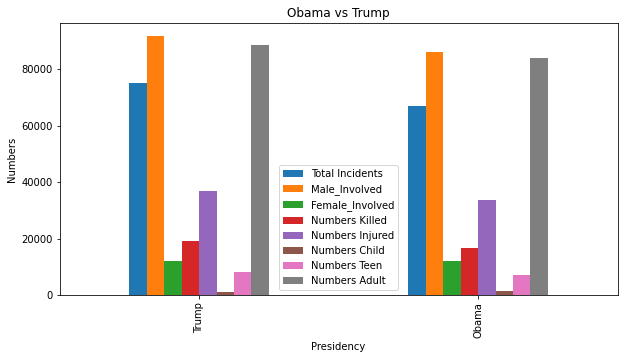

<Figure size 432x288 with 0 Axes>

In [134]:
#graph

ObamaTrump = pres_summary_df.plot(kind="bar", figsize=(10,5))
multi_plot.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=4)

# Plot x and y labels and title
plt.title('Obama vs Trump')
plt.xlabel('Presidency')
plt.ylabel('Numbers')

plt.show()
plt.tight_layout()

In [552]:
# Obama Analysis Male
Obama_Df = re_Crime.loc[re_Crime["Presidency"] == "Obama"]
cnt_Incident = Obama_Df.groupby('Presidency').count()['Incident']
Male_Incident = Obama_Df.groupby('Presidency').sum()['Male']
Male_Mean = Obama_Df.groupby('Presidency').mean()['Male']
Male_Median = Obama_Df.groupby('Presidency').median()['Male']
Male_Var = Obama_Df.groupby('Presidency').var()['Male']
Male_sds = Obama_Df.groupby('Presidency').std()['Male']
Male_sems = Obama_Df.groupby('Presidency').sem()['Male']

summary_Obama_male = pd.DataFrame({"Total Incidents":cnt_Incident,
                              "Male Mean":Male_Mean,
                              "Male Median":Male_Median,
                              "Male Variance":Male_Var,
                              "Male Std. Dev":Male_sds,
                              "Male Std. Err":Male_sems })
summary_Obama_male

,Total Incidents,Male Mean,Male Median,Male Variance,Male Std. Dev,Male Std. Err
Presidency,,,,,,
Obama,67028,1.52573,1.0,0.970118,0.984946,0.003804


In [553]:
# Trump Analysis Male
Trump_Df = re_Crime.loc[re_Crime["Presidency"] == "Trump"]
cnt_Incident = Trump_Df.groupby('Presidency').count()['Incident']
Male_Incident = Trump_Df.groupby('Presidency').sum()['Male']
Male_Mean = Trump_Df.groupby('Presidency').mean()['Male']
Male_Median = Trump_Df.groupby('Presidency').median()['Male']
Male_Var = Trump_Df.groupby('Presidency').var()['Male']
Male_sds = Trump_Df.groupby('Presidency').std()['Male']
Male_sems = Trump_Df.groupby('Presidency').sem()['Male']

summary_Trump_male = pd.DataFrame({"Total Incidents":cnt_Incident,
                              "Male Mean":Male_Mean,
                              "Male Median":Male_Median,
                              "Male Variance":Male_Var,
                              "Male Std. Dev":Male_sds,
                              "Male Std. Err":Male_sems })
summary_Trump_male

,Total Incidents,Male Mean,Male Median,Male Variance,Male Std. Dev,Male Std. Err
Presidency,,,,,,
Trump,75203,1.460143,1.0,0.876568,0.936252,0.003414


In [554]:
# Obama Analysis Female
Obama_Df = re_Crime.loc[re_Crime["Presidency"] == "Obama"]
cnt_Incident = Obama_Df.groupby('Presidency').count()['Incident']
Female_Incident = Obama_Df.groupby('Presidency').sum()['Female']
Female_Mean = Obama_Df.groupby('Presidency').mean()['Female']
Female_Median = Obama_Df.groupby('Presidency').median()['Female']
Female_Var = Obama_Df.groupby('Presidency').var()['Female']
Female_sds = Obama_Df.groupby('Presidency').std()['Female']
Female_sems = Obama_Df.groupby('Presidency').sem()['Female']

summary_Obama_female = pd.DataFrame({"Total Incidents":cnt_Incident,
                              "Female Mean":Female_Mean,
                              "Female Median":Female_Median,
                              "Female Variance":Female_Var,
                              "Female Std. Dev":Female_sds,
                              "Female Std. Err":Female_sems })
summary_Obama_female

,Total Incidents,Female Mean,Female Median,Female Variance,Female Std. Dev,Female Std. Err
Presidency,,,,,,
Obama,67028,0.215942,0.0,0.238342,0.488203,0.002053


In [555]:
#Trump Analysis Female
Trump_Df = re_Crime.loc[re_Crime["Presidency"] == "Trump"]
cnt_Incident = Trump_Df.groupby('Presidency').count()['Incident']
Female_Incident = Trump_Df.groupby('Presidency').sum()['Female']
Female_Mean = Trump_Df.groupby('Presidency').mean()['Female']
Female_Median = Trump_Df.groupby('Presidency').median()['Female']
Female_Var = Trump_Df.groupby('Presidency').var()['Female']
Female_sds = Trump_Df.groupby('Presidency').std()['Female']
Female_sems = Trump_Df.groupby('Presidency').sem()['Female']

summary_Trump_female = pd.DataFrame({"Total Incidents":cnt_Incident,
                              "Female Mean":Female_Mean,
                              "Female Median":Female_Median,
                              "Female Variance":Female_Var,
                              "Female Std. Dev":Female_sds,
                              "Female Std. Err":Female_sems })
summary_Trump_female

,Total Incidents,Female Mean,Female Median,Female Variance,Female Std. Dev,Female Std. Err
Presidency,,,,,,
Trump,75203,0.191121,0.0,0.221447,0.470582,0.001877


In [556]:
# Obama Analysis Nubmer Killed
Obama_Df = re_Crime.loc[re_Crime["Presidency"] == "Obama"]
cnt_Incident = Obama_Df.groupby('Presidency').count()['Incident']
Killed_Incident = Obama_Df.groupby('Presidency').sum()['Number Killed']
Killed_Mean = Obama_Df.groupby('Presidency').mean()['Number Killed']
Killed_Median = Obama_Df.groupby('Presidency').median()['Number Killed']
Killed_Var = Obama_Df.groupby('Presidency').var()['Number Killed']
Killed_sds = Obama_Df.groupby('Presidency').std()['Number Killed']
Killed_sems = Obama_Df.groupby('Presidency').sem()['Number Killed']

summary_Obama_Killed = pd.DataFrame({"Total Incidents":cnt_Incident,
                              "Killed Mean":Killed_Mean,
                              "Killed Median":Killed_Median,
                              "Killed Variance":Killed_Var,
                              "Killed Std. Dev":Killed_sds,
                              "Killed Std. Err":Killed_sems })
summary_Obama_Killed

,Total Incidents,Killed Mean,Killed Median,Killed Variance,Killed Std. Dev,Killed Std. Err
Presidency,,,,,,
Obama,67028,0.250462,0.0,0.260152,0.510051,0.00197


In [557]:
# Trump Analysis Nubmer Killed
Trump_Df = re_Crime.loc[re_Crime["Presidency"] == "Trump"]
cnt_Incident = Trump_Df.groupby('Presidency').count()['Incident']
Killed_Incident = Trump_Df.groupby('Presidency').sum()['Number Killed']
Killed_Mean = Trump_Df.groupby('Presidency').mean()['Number Killed']
Killed_Median = Trump_Df.groupby('Presidency').median()['Number Killed']
Killed_Var = Trump_Df.groupby('Presidency').var()['Number Killed']
Killed_sds = Trump_Df.groupby('Presidency').std()['Number Killed']
Killed_sems = Trump_Df.groupby('Presidency').sem()['Number Killed']

summary_Trump_Killed = pd.DataFrame({"Total Incidents":cnt_Incident,
                              "Killed Mean":Killed_Mean,
                              "Killed Median":Killed_Median,
                              "Killed Variance":Killed_Var,
                              "Killed Std. Dev":Killed_sds,
                              "Killed Std. Err":Killed_sems })
summary_Trump_Killed

,Total Incidents,Killed Mean,Killed Median,Killed Variance,Killed Std. Dev,Killed Std. Err
Presidency,,,,,,
Trump,75203,0.253235,0.0,0.266607,0.51634,0.001883


In [558]:
# Obama Analysis Number Injured
Obama_Df = re_Crime.loc[re_Crime["Presidency"] == "Obama"]
cnt_Incident = Obama_Df.groupby('Presidency').count()['Incident']
Injured_Incident = Obama_Df.groupby('Presidency').sum()['Number Injured']
Injured_Mean = Obama_Df.groupby('Presidency').mean()['Number Injured']
Injured_Median = Obama_Df.groupby('Presidency').median()['Number Injured']
Injured_Var = Obama_Df.groupby('Presidency').var()['Number Injured']
Injured_sds = Obama_Df.groupby('Presidency').std()['Number Injured']
Injured_sems = Obama_Df.groupby('Presidency').sem()['Number Injured']

summary_Obama_Injured= pd.DataFrame({"Total Incidents":cnt_Incident,
                              "Injured Mean":Injured_Mean,
                              "Injured Median":Injured_Median,
                              "Injured Variance":Injured_Var,
                              "Injured Std. Dev":Injured_sds,
                              "Injured Std. Err":Injured_sems })
summary_Obama_Injured

,Total Incidents,Injured Mean,Injured Median,Injured Variance,Injured Std. Dev,Injured Std. Err
Presidency,,,,,,
Obama,67028,0.499955,0.0,0.503514,0.709587,0.002741


In [559]:
# Trump Analysis Number Injured
Trump_Df = re_Crime.loc[re_Crime["Presidency"] == "Trump"]
cnt_Incident = Trump_Df.groupby('Presidency').count()['Incident']
Injured_Incident = Trump_Df.groupby('Presidency').sum()['Number Injured']
Injured_Mean = Trump_Df.groupby('Presidency').mean()['Number Injured']
Injured_Median = Trump_Df.groupby('Presidency').median()['Number Injured']
Injured_Var = Trump_Df.groupby('Presidency').var()['Number Injured']
Injured_sds = Trump_Df.groupby('Presidency').std()['Number Injured']
Injured_sems = Trump_Df.groupby('Presidency').sem()['Number Injured']

summary_Trump_Injured= pd.DataFrame({"Total Incidents":cnt_Incident,
                              "Injured Mean":Injured_Mean,
                              "Injured Median":Injured_Median,
                              "Injured Variance":Injured_Var,
                              "Injured Std. Dev":Injured_sds,
                              "Injured Std. Err":Injured_sems })
summary_Trump_Injured

,Total Incidents,Injured Mean,Injured Median,Injured Variance,Injured Std. Dev,Injured Std. Err
Presidency,,,,,,
Trump,75203,0.490326,0.0,0.498866,0.706304,0.002576
